In [161]:
#!pip install opendatasets -q

In [162]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
#import opendatasets as od

In [ ]:
#Load Dataset

#od.download("https://www.kaggle.com/competitions/digit-recognizer/data")

#{"username":"dasundhananjaya","key":"2c9084bf70d50b32527c5f61d19a072d"}

In [164]:
sample = pd.read_csv('data/sample_submission.csv')

test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')



In [165]:
len(train),len(test),len(sample)

(42000, 28000, 28000)

In [166]:
print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [167]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [168]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [169]:
print(train['label'].unique())
print(train['label'].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


In [170]:
# prompt: generate a code to find out if there are column name "label" in train

"label" in test.columns


False

In [171]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


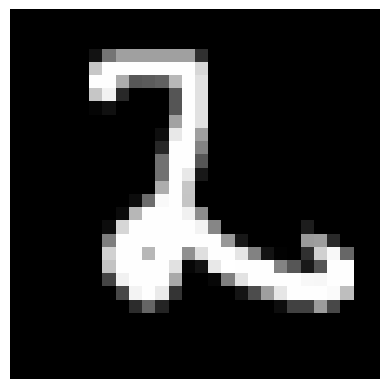

In [172]:
# prompt: genarate code to view sample image of train

import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the training set.
index = np.random.randint(0, len(train))
image = train.iloc[index, 1:].values.reshape((28, 28))

# Display the image.
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [173]:
x = train.drop('label',axis=1) #
y = train['label']

In [174]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [175]:
x_train.shape

(33600, 784)

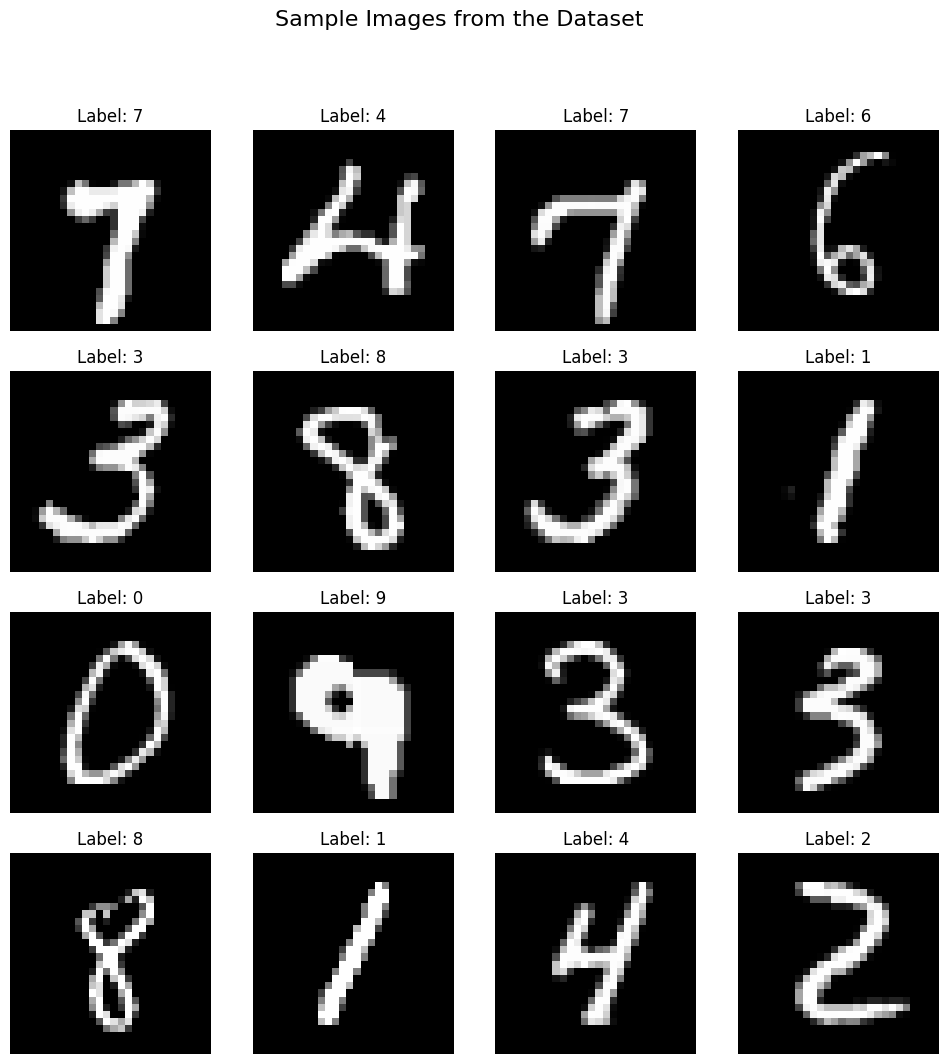

In [176]:
cols = 4
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    # Select a random image from the training set.
    index = np.random.randint(0, len(train))
    image = train.iloc[index, 1:].values.reshape((28, 28))

    # Display the image.
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {train.iloc[index, 0]}", fontsize=12)

plt.suptitle("Sample Images from the Dataset", fontsize=16)
plt.show()

In [177]:
x_train.shape , y_train.shape

((33600, 784), (33600,))

In [178]:
#Reshape images

x_train=x_train.values.reshape(x_train.shape[0],28,28,1)/255.0
x_test=test.values.reshape(test.shape[0],28,28,1)/255.0


In [179]:
x_train.shape,x_test.shape

((33600, 28, 28, 1), (28000, 28, 28, 1))

In [180]:
(x_train.ndim),(x_test.ndim),(y_train.ndim),(y_test.ndim)

(4, 4, 1, 1)

In [181]:


# Convert y_train to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()


In [ ]:
test.shape

In [ ]:
import tensorflow as tf

Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)




# Recompile the model with the new y_train shape
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)
#history = model.fit(x_train,y_train, # now 10 different classes
#                    epochs=5,
                    #steps_per_epoch=len(x_train),
                    #validation_data=x_test,
                    #validation_steps=len(x_test)
#                    )

In [ ]:
x_train.shape, x_train.shape


In [ ]:
# Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Show the graphic
plt.tight_layout()
plt.show()

In [ ]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Train loss vs Validation Loss")
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Train accuracy vs Validation accuracy 2")
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()

In [ ]:
plot_history(history)

https://www.kaggle.com/models/tensorflow/mnist

# Model Evaluation

In [ ]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [ ]:
x = train.drop('label',axis=1) #
y = train['label']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_test.shape,y_test.shape

In [ ]:
x_test_for_pred = x_test.values.reshape(len(x_test),28,28,1)

In [ ]:
x_test_for_pred.shape,y_test.shape

In [ ]:
y_test_to_pred = tf.keras.utils.to_categorical(y_test)
y_test_to_pred.shape

In [ ]:
model.evaluate(x_test_for_pred,y_test_to_pred)

## Get the predictions

In [ ]:
y_pred = model.predict(x_test_for_pred)
y_pred[:5]

### Accuracy

In [ ]:

accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_test_to_pred, tf.round(y_pred))
accuracy.result()

### Precision

In [ ]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test_to_pred,y_pred)
precision.result()

### Recall

In [ ]:
recall = tf.keras.metrics.Recall()
recall.update_state(y_test_to_pred,y_pred)
recall.result()

# Model Saving

In [ ]:
#model.save('saved_model')
#model.save('saved_model_h5.h5')